In [3]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [7]:
# Reading data
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
# checking missing values in the data
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

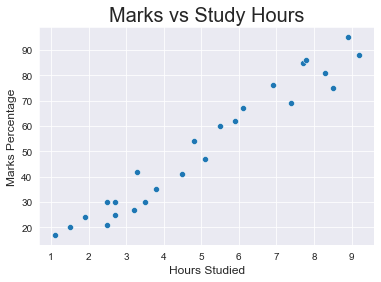

In [10]:
sns.set_style('darkgrid')
sns.scatterplot(y=data['Scores'], x = data['Hours'])
plt.title('Marks vs Study Hours', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

Scatter plot indicates that there is a correlation between marks percentage and hours studied. Drawing regression line to confirm the correlation


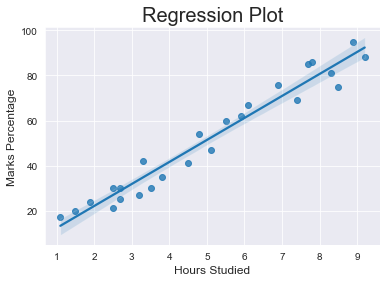

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [11]:
sns.regplot(x=data['Hours'], y=data['Scores'])
plt.title('Regression Plot', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

In [19]:
# (1)Splitting the data
# Defining x and y from the data
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values
# splitting the data in two
train_x, valid_x, train_y, valid_y=train_test_split(x,y, random_state=0)

In [20]:
# (2)Fitting the data into the model
regression = LinearRegression()
regression.fit(train_x, train_y)
print("Model Trained")

Model Trained


In [21]:
pred_y = regression.predict(valid_x)
prediction=pd.DataFrame({'Hours':[i[0] for i in valid_x], 'Predicted Marks':[k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [22]:
# Calculating the accuracy of model
print('Mean absolute error:', mean_absolute_error(valid_y, pred_y))

Mean absolute error: 4.130879918502486


In [23]:
hours=[9.25]
result = regression.predict([hours])
print("Score = {}".format(round(result[0],3)))

Score = 93.893
